In [17]:
import cv2 
import numpy as np
import torch
import torch.nn.functional as F
from model import CNN 
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# import the trained model for predictions
model = CNN()

trained_model = torch.load('model_trained.pth')
model.state_dict(trained_model)

#Plotting function
def view_classify(img, ps):

    ps = ps.cpu().data.numpy().squeeze()
    img= img.cpu().data.numpy()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.reshape(1, 28, 28).squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [4]:
def imshow(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(image)


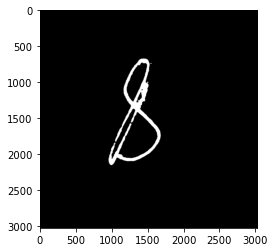

In [6]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS, (15,15))
n8=cv2.imread('/Users/szokirov/Documents/GitHub/opencv_projects/handwritten_digits/8.jpeg')
bgr_n8=n8.copy()
bgr_n8=cv2.cvtColor(bgr_n8, cv2.COLOR_BGR2RGB)
gray_n8=n8.copy()
gray_n8=cv2.cvtColor(gray_n8, cv2.COLOR_BGR2GRAY)
retval, dst= cv2.threshold(gray_n8, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(dst, cmap='gray')

In [9]:
contours, h = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours = sorted(contours, key = cv2.contourArea, reverse=True)
len(contours)

34

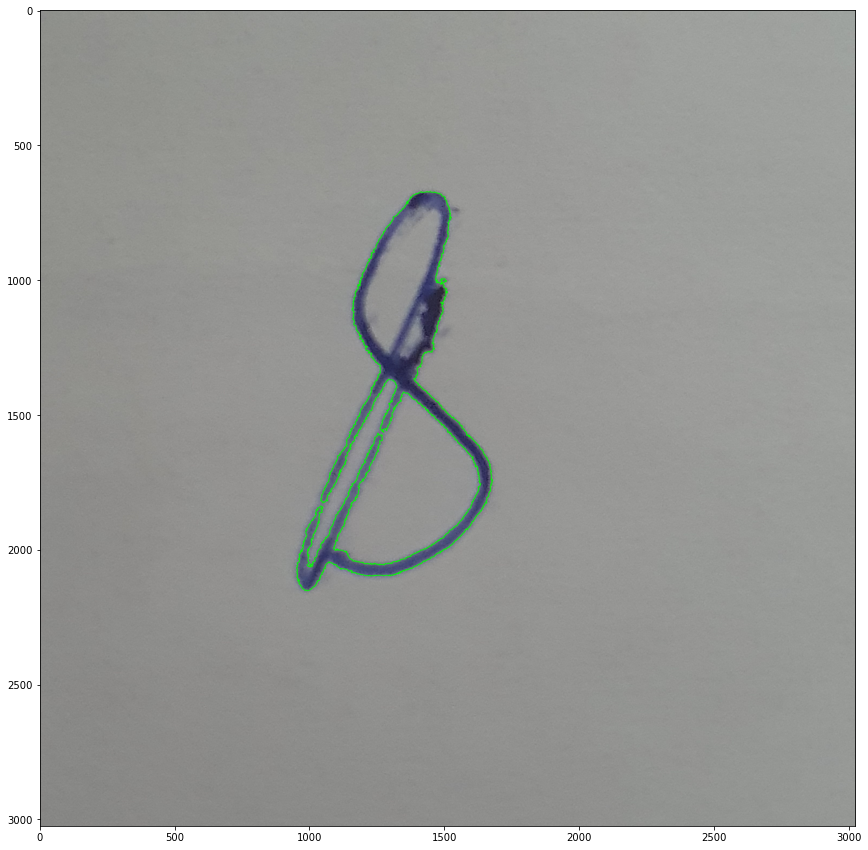

In [10]:
copy = n8.copy()
cv2.drawContours(copy, sorted_contours, 0, (0, 255, 0), 2)
imshow(copy)

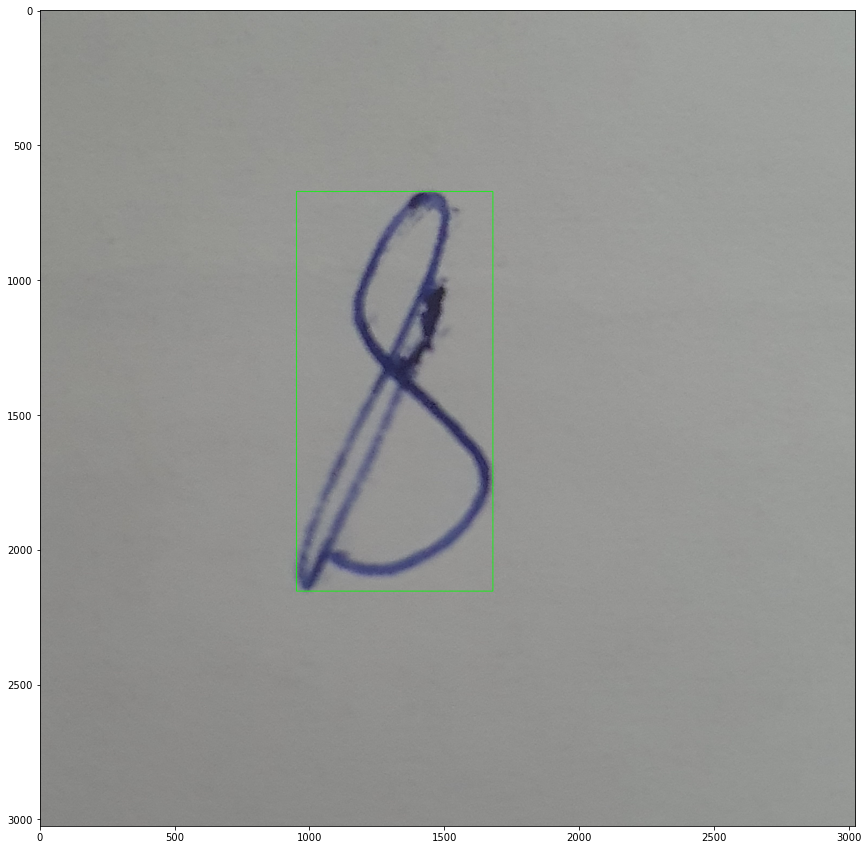

In [11]:
x, y, w, h = cv2.boundingRect(sorted_contours[0])
copy = n8.copy()
cv2.rectangle(copy, (x,y), (x+w, y+h), (0, 255, 0), 2)
imshow(copy)

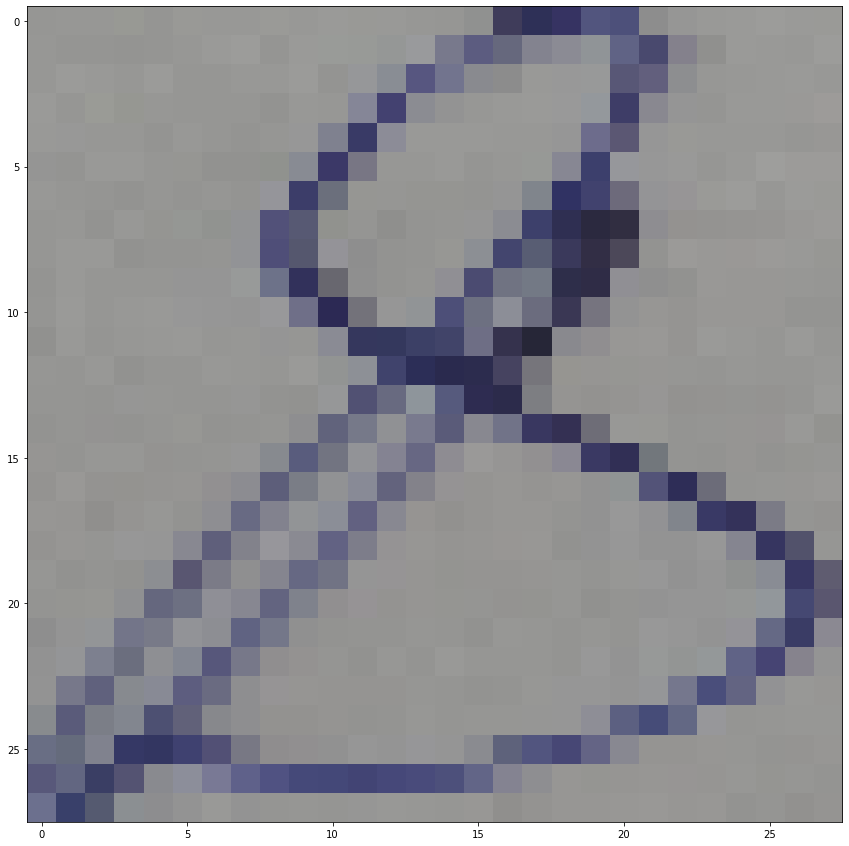

In [13]:
number_itself = n8[y:y+h, x:x+w]
number_itself = cv2.resize(number_itself, (28, 28))
imshow(number_itself)

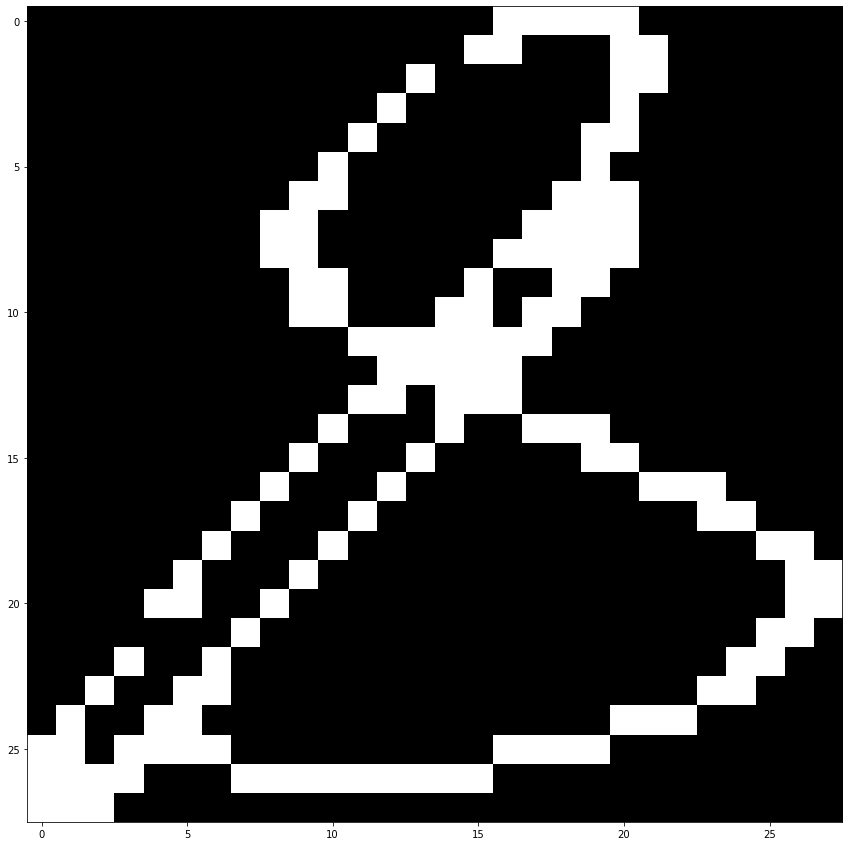

In [15]:
gray_n8=number_itself.copy()
gray_n8=cv2.cvtColor(gray_n8, cv2.COLOR_BGR2GRAY)
retval, dst= cv2.threshold(gray_n8, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imwrite('for_pred.png', dst)
imshow(dst)

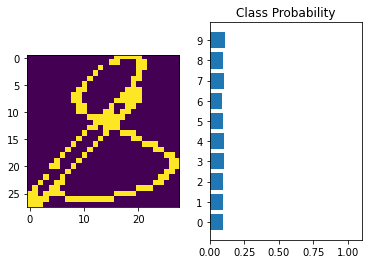

In [19]:
img_transformer=transforms.Compose([transforms.Grayscale(),transforms.Resize((28, 28)), 
                transforms.ToTensor(), 
                transforms.Normalize(mean=[(0.5)], std=[(0.5)])])

dst=Image.open('for_pred.png')
input_tensor= img_transformer(dst)
input_batch=input_tensor.unsqueeze(0)

output=model.forward(input_batch)
probability=F.softmax(output, dim=1)
probability = probability.cpu().data.numpy().squeeze()

plt.subplot(1,2,1)
plt.imshow(dst)
plt.subplot(1,2,2)
plt.barh(np.arange(10), probability)
plt.yticks(np.arange(10))
plt.title('Class Probability')
plt.xlim(0, 1.1)
plt.show()